### This succeeds the plot_func module.
#### changes: 
- 7/29 
    
    """ nrows x ncols = size(filename_list)
        !!!plotting order is inherent from filname_list.flat
        filename_list should be subfolders in the sample folder
        scatflag is turned off, since most samples are large. 
        no density plot associated. 
        all gamma plot put in grid.
        the conditions wanted to be plotted should be saved in IA_Numeric_Output/sample_folder/, which will be searche automatically.
        will also generate the STD data.
        """

In [4]:
import sys
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import execution_func as ef
import re
#for i in os.listdir("/home/azhou/IA-Sim-AZhou00/IA_Numeric_Output/Uniform Smearing/"):
    

In [21]:
%%writefile ia_plot_cross_condition.py

#cross_condition_error_bar_plot(smoothing_len,outputpath) <- THIS IS PREFERRED
    
#The error bar function
#in each folder of Gamma_plus_some_qualifiers, there are data of multiple runs on the same setting
#so first we want to navigate to that folder via search_path, and read all the Gamma_plus_files
#This function searches for all the files in a folder. The files should all contain version two data structure. 
#It applies smoothing first, then
#It takes the two lines that signifies the 1 and 2 th STD upper&lower bounds
#and return these 4 lines in one 2-D file that contain both lists.

def linear_cross_condition_error_bar_plot(smoothing_len,sample_folder,foldername_list,nrows_,ncols_): 
    """ the linear part of the function is only through the subgraph naming system
        nrows x ncols = size(foldername_list)
        !!!plotting order is inherent from foldername_list.flat
        foldername_list should be subfolders in the sample folder
        scatflag is turned off, since most samples are large. 
        no density plot associated. 
        all gamma plot put in grid.
        the conditions wanted to be plotted should be saved in IA_Numeric_Output/sample_folder/, which will be searche automatically.
        will also generate the STD data.
        """
    SCATFLAG= False
    #outputpath is where the figure folder is saved
    #searchpath is where all the gamma_plus data are stored
    #will save a file, and a plot     
    #[
    #[y value of  std 1 upperbound],
    #[y value of  std 1 lowerbound],
    #[y value of  std 2 upperbound],
    #[y value of  std 2 lowerbound],
    #[smoothed radial coordinate]
    #]
    
    import sys
    import os
    import numpy as np
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import execution_func as ef
    import re
    
    if np.size(foldername_list) != ncols_*nrows_: sys.exit(['error(s) in grid size'])
    fig, axs = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(40, 40))#,subplot_kw={'xticks': [], 'yticks': []})

    for ax, run_folder in zip(axs.flat, foldername_list):
        outputpath = '/home/azhou/IA-Sim-AZhou00/IA_Numeric_Output/'
        outputpath = os.path.join(outputpath,sample_folder)
        outputpath = os.path.join(outputpath,run_folder)
        searchpath = os.path.join(outputpath,'gamma_plus/')        
##        ax.imshow(grid, interpolation=interp_method, cmap='viridis')
#       ax.set_title(str(interp_method))
#
 #   plt.
  #  plt.show()

        path_bar_search = re.search('baR_0 ([+-]?([0-9]*[.])?[0-9]+)', outputpath, re.IGNORECASE)
        baR_0 = float(path_bar_search.group(1))
        path_a1_search = re.search('slp ([+-]?([0-9]*[.])?[0-9]+)', outputpath, re.IGNORECASE)
        a1 = float(path_a1_search.group(1))
        path_a2_search = re.search('itcp ([+-]?([0-9]*[.])?[0-9]+)', outputpath, re.IGNORECASE)
        a2 = float(path_a2_search.group(1))
        #a1=1
        #a2=1

        #consistency checks:
        #1. the n in file name should  = the stored array length in each dimension
        #2. the smoothing length needs to be a factor of n. here only the linear simulation is checked
        path_n_search = re.search('n (\d+)', outputpath, re.IGNORECASE)
        n = int(path_n_search.group(1))
        rs_check=ef.read_file_from_name(searchpath,'0linearmod')
        if (n != len(rs_check[1,:])):
            sys.exit(['error(s) in log radial vector(s)!!!'])


        #LOG CURVES STD
        searchpath = os.path.join(outputpath,'gamma_plus/')
        gamma_log = np.empty((0,int(n/smoothing_len)))
        for i in os.listdir(searchpath):
            if i.endswith("logmod"):
                if os.path.isfile(os.path.join(searchpath, i)): #check if it is file and not directory
                    [temp_r,temp_gam] = ef.read_file_from_name(searchpath,i)
                    temp_gam_smoothed = np.array([sum(temp_gam[i:i+smoothing_len])/smoothing_len for i in range(0,len(temp_gam),smoothing_len)])
                    temp_r_smoothed = np.array([sum(temp_r[i:i+smoothing_len])/smoothing_len for i in range(0,len(temp_r),smoothing_len)])
                    gamma_log = np.vstack((gamma_log,temp_gam_smoothed))
        error_GamPls_log = ef.sort_matrix_columns(gamma_log)
        #print(complete_GamPls)
        error_GamPls_log = ef.get_1_2_std(error_GamPls_log)
        #print(complete_GamPls)
        error_GamPls_log = np.vstack((error_GamPls_log,temp_r_smoothed)) #attach the smoothed x coordinate
        #save in the figures folder
        ef.write_file_at_path(outputpath, 'STD',error_GamPls_log,'gamma smth %i log'%smoothing_len)

        #LINEAR CURVES STD
        searchpath = os.path.join(outputpath,'gamma_plus/')
        gamma_linear = np.empty((0,int(n/smoothing_len)))
        for i in os.listdir(searchpath):
            if i.endswith("linearmod"):
                if os.path.isfile(os.path.join(searchpath, i)): #check if it is file and not directory
                    [temp_r,temp_gam] = ef.read_file_from_name(searchpath,i)
                    temp_gam_smoothed = np.array([sum(temp_gam[i:i+smoothing_len])/smoothing_len for i in range(0,len(temp_gam),smoothing_len)])
                    temp_r_smoothed = np.array([sum(temp_r[i:i+smoothing_len])/smoothing_len for i in range(0,len(temp_r),smoothing_len)])
                    gamma_linear = np.vstack((gamma_linear,temp_gam_smoothed))
        error_GamPls_linear = ef.sort_matrix_columns(gamma_linear)
        #print(complete_GamPls)
        error_GamPls_linear = ef.get_1_2_std(error_GamPls_linear)
        #print(complete_GamPls)
        error_GamPls_linear = np.vstack((error_GamPls_linear,temp_r_smoothed)) #attach the smoothed x coordinate
        #save in the figures folder
        ef.write_file_at_path(outputpath, 'STD',error_GamPls_linear,'gamma smth %i linear'%smoothing_len)


        asymp = np.array([])
        asymp_value = float((1-(baR_0)**2)/(1+(baR_0)**2)) #asymptotic value assuming perfect alignment. Used as a reference curve
        for i in range(int(n/smoothing_len)):
            asymp = np.append(asymp,asymp_value)
        y_0 = np.zeros(int(n/smoothing_len))    

        
        #HybridLOG PLOT:
        if SCATFLAG == True:
            for g in gamma_log:
                ax1.scatter(error_GamPls_log[4],g,c='r',s=0.75,marker='o')
            for g in gamma_linear:
                ax1.scatter(error_GamPls_linear[4],g,c='b',s=0.75,marker='o')
        ax.fill_between(error_GamPls_log[4],error_GamPls_log[2],error_GamPls_log[3],alpha = 0.4,label='log_2nd STD')    
        ax.fill_between(error_GamPls_log[4],error_GamPls_log[0],error_GamPls_log[1],alpha = 0.6,label='log_1st STD')
        #ax.fill_between(error_GamPls_linear[4],error_GamPls_linear[2],error_GamPls_linear[3],alpha = 0.3,label='linear_2nd STD')    
        #ax.fill_between(error_GamPls_linear[4],error_GamPls_linear[0],error_GamPls_linear[1],alpha = 0.4,label='linear_1st STD')
        ax.plot(error_GamPls_log[4],asymp,"--",label=("asymptotic value %1.3f, b/a_0 = %1.2f" %(asymp_value, baR_0)))
        ax.plot(error_GamPls_log[4],y_0,label='y=0')
        ax.set_xscale('log')
        ax.set_xlabel('r')
        ax.set_ylabel('gamma +')
        ax.grid(b=True,which='both')
        ax.set_xlim(0.01,1)
        ax.set_ylim(-0.1,0.5)
        ax.set_title('slp='+str(a1)+'. itcp='+str(a2))
        #ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    
    #fig.suptitle('red:log sim; blue:linear sim. smoothing=%i \n b/a=%f1.1 PAG=%f1.1 \n'% (smoothing_len,baR_0,asymp_value))
    fig.tight_layout()
    
    outputpath = '/home/azhou/IA-Sim-AZhou00/IA_Numeric_Output/'
    outputpath = os.path.join(outputpath,sample_folder)
    imagesavepath = os.path.join(outputpath, 'figures')
    if not os.path.exists(imagesavepath):
        os.makedirs(imagesavepath)
    fig.savefig(os.path.join(imagesavepath, 'larger cropped y exclude Linear Sim Gamma STD smth %i '%smoothing_len), bbox_inches = 'tight')  

Overwriting ia_plot_cross_condition.py


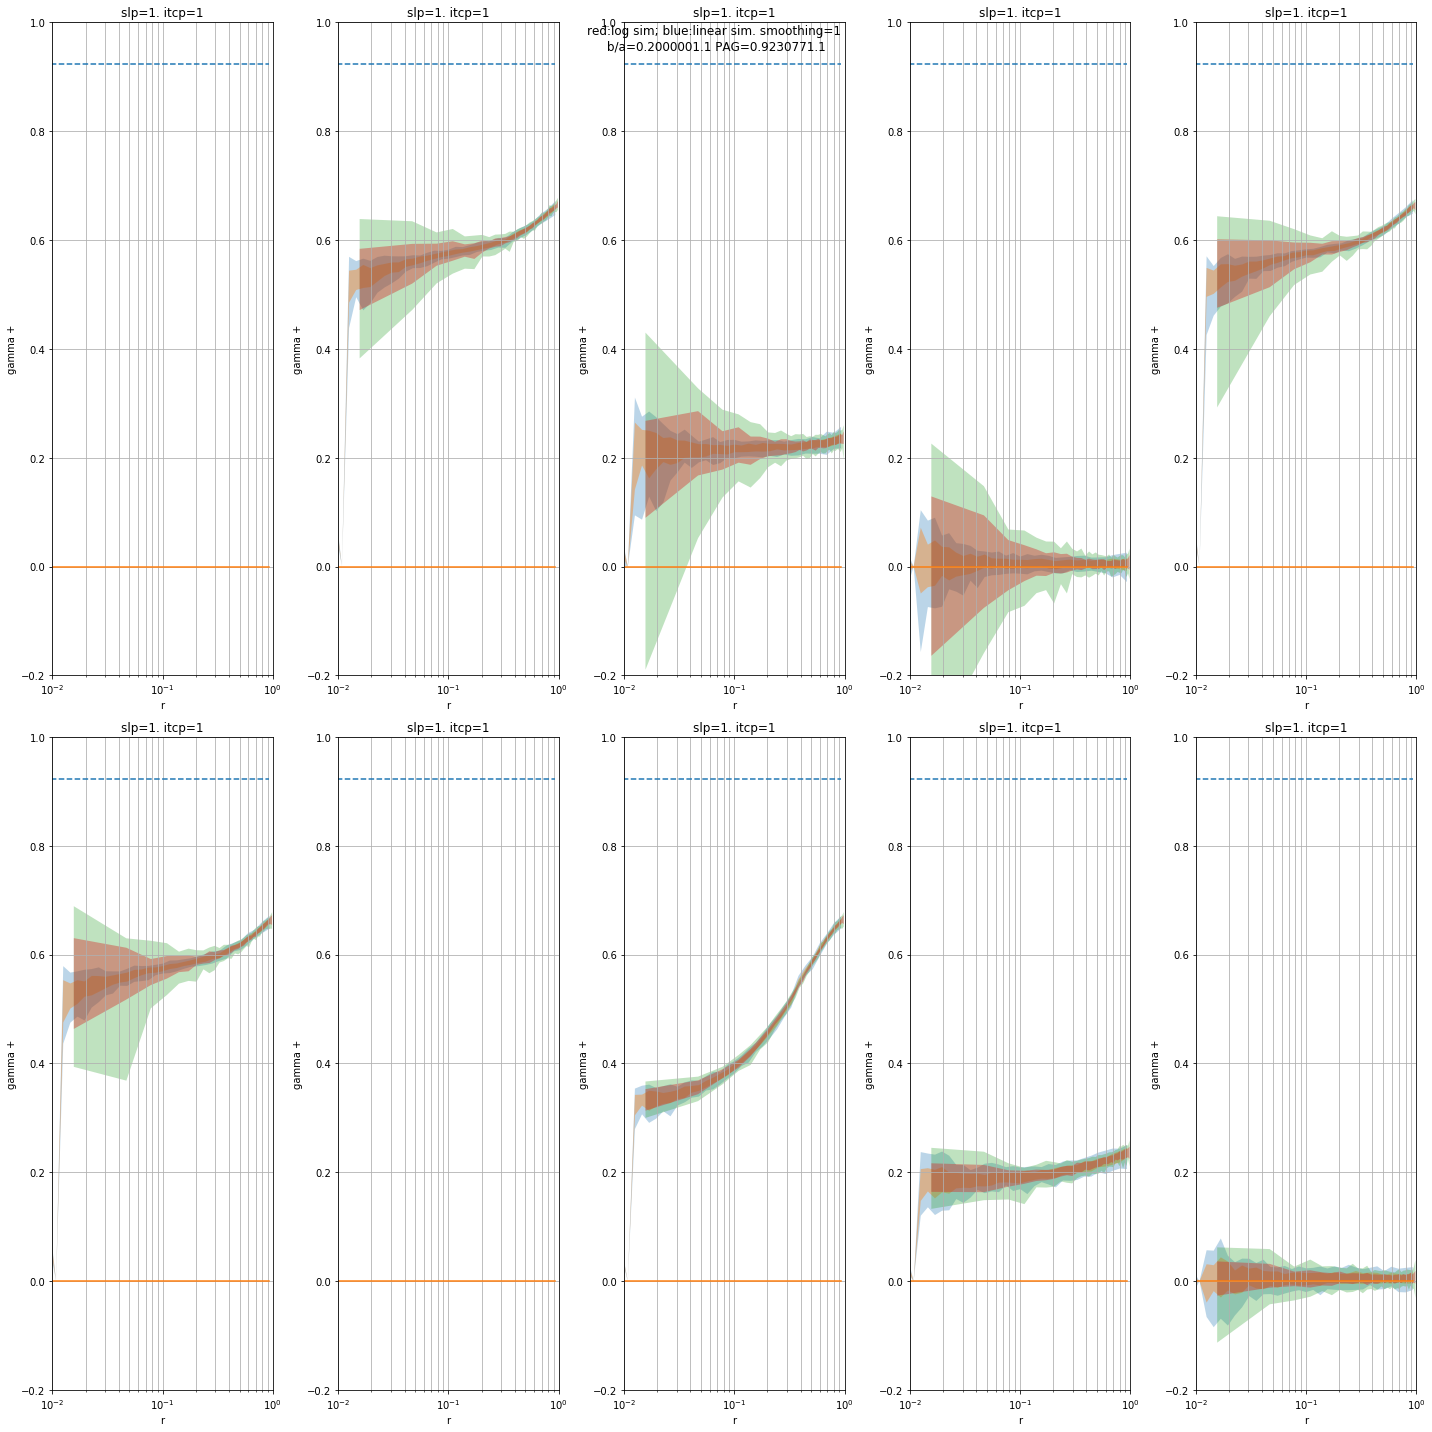

In [15]:
folder_list = np.array([])
for i in os.listdir('/home/azhou/IA-Sim-AZhou00/IA_Numeric_Output/Uniform Smearing'):
    folder_list = np.append(folder_list,i)
linear_cross_condition_error_bar_plot(1,"Uniform Smearing",folder_list,2,5)

In [ ]:
n=32
baR_0 = 0.3
concentration = 20 #R_virial = Rs*c. since R_virial is usually chosen as the cut of limit for density profiles, we set it to 1.
density_std = 0 #fractional difference as std

a1s = np.linspace(0,np.pi/2,10)
a2s = np.linspace(0,np.pi/2,10)
folder_list = np.array([])
for smr_slope_run in a1s:
    for smr_intercept_run in a2s:
        run_folder = 'n %i c %i rhostd %1.2f baR_0 %1.2f slp %1.2f itcp %1.2f'%(n,concentration,density_std,baR_0,rad_to_deg(smr_slope_run),rad_to_deg(smr_intercept_run))
        folder_list = np.append(folder_list,run_folder)
linear_cross_condition_error_bar_plot(1,"Linear Smearing",folder_list,10,10)